---

#### 1. Signal Processing: an overview

We will walk through some essential items in a signal processor's toolbox when dealing with a noisy signal. Machine learning and signal processing in general will be about using the tools presented below (which is no where near a comprehensive list) 

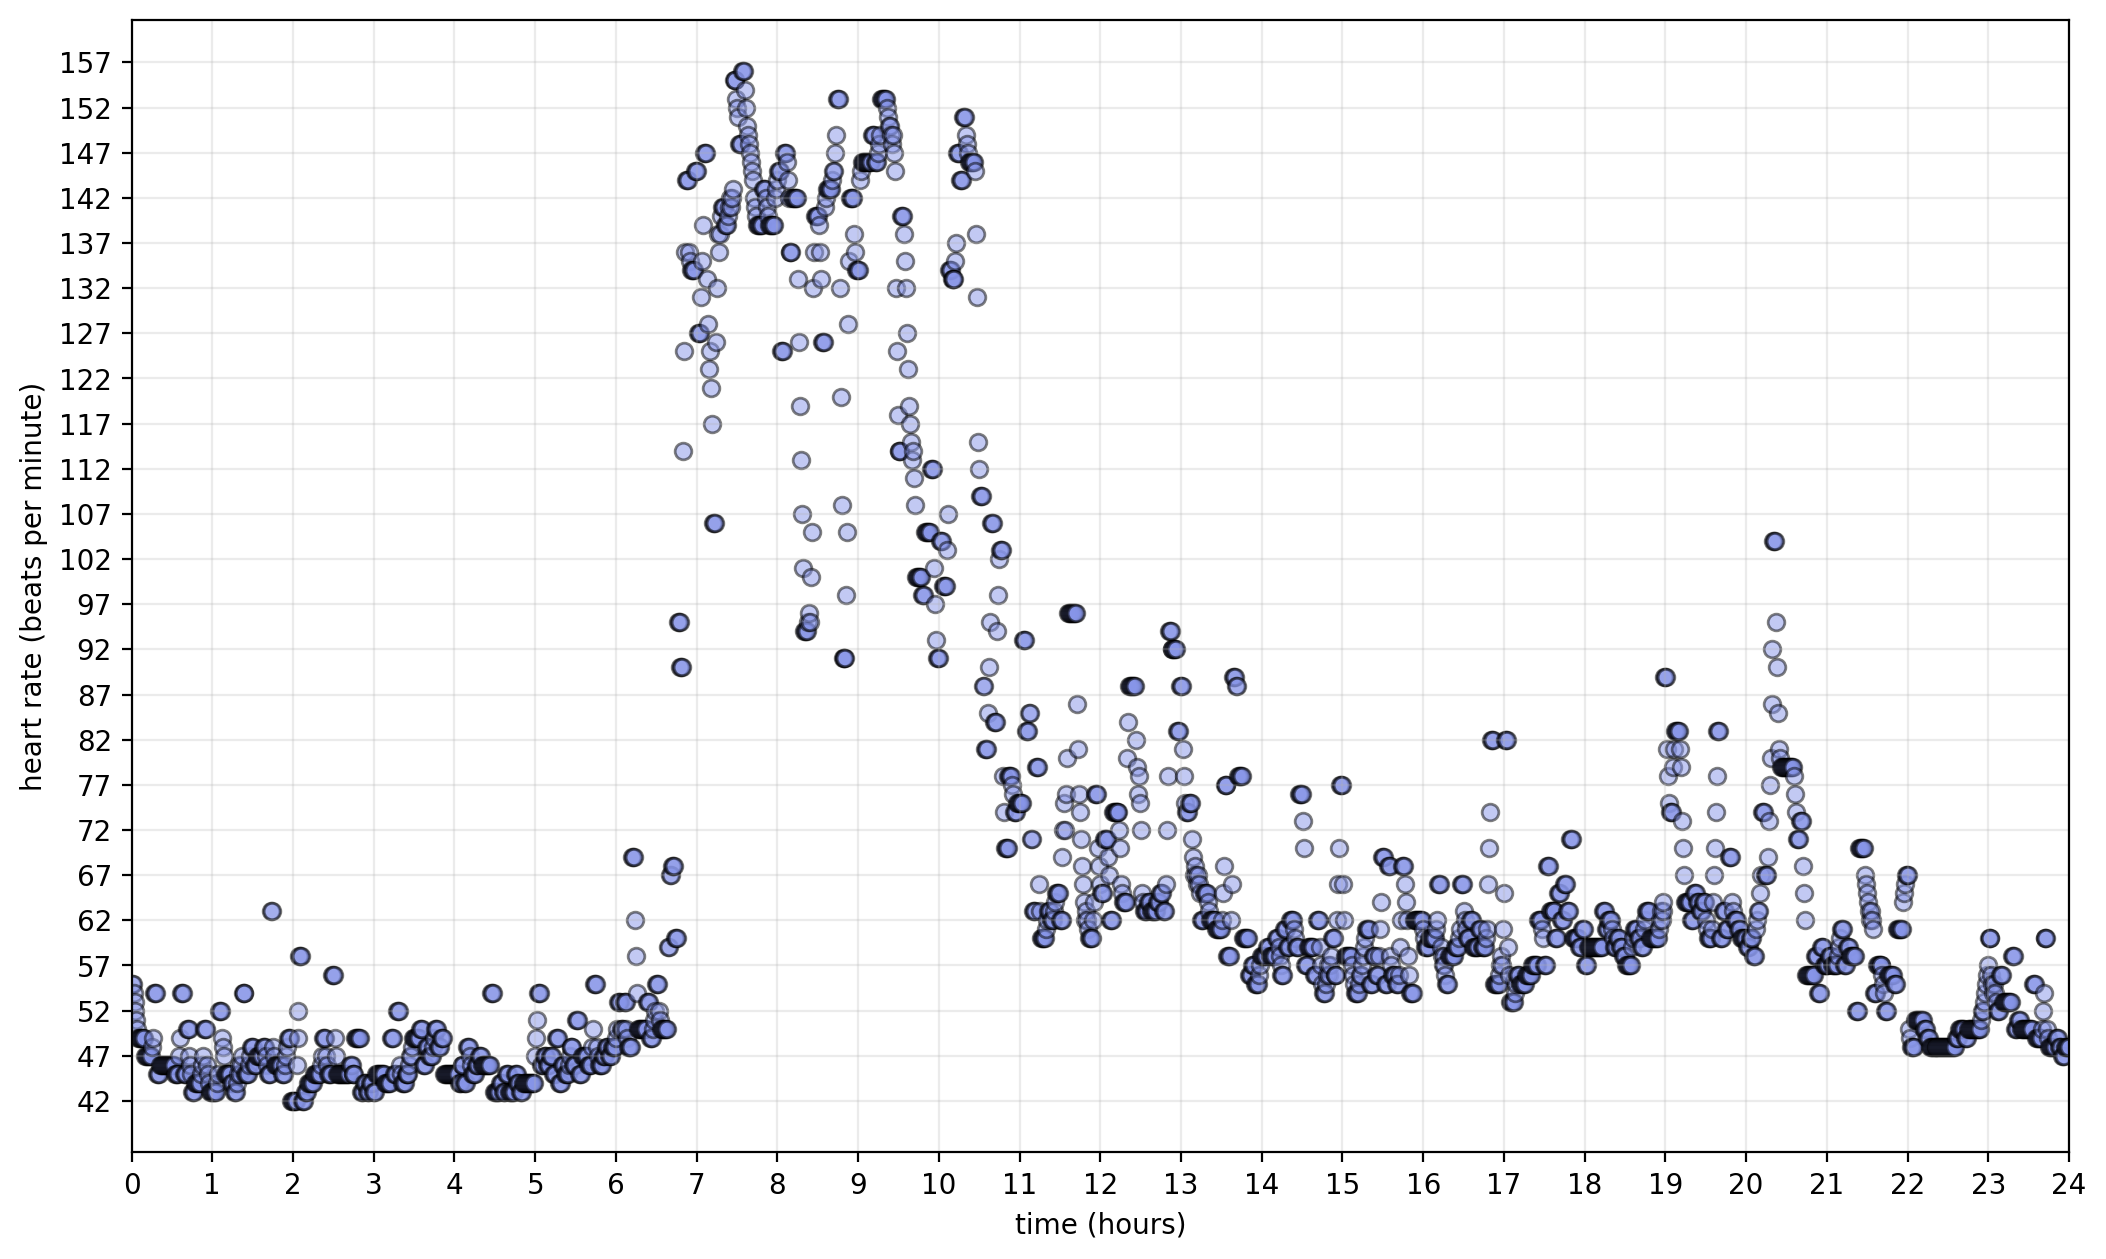

In [1]:
### Don't edit this code ###
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_reader = csv.reader(open('data/data1_HR.csv'))
Y = np.expand_dims(np.squeeze(np.asarray(list(csv_reader), dtype=int)), axis=1)
X = np.expand_dims(np.linspace(start=0, stop=24, num=len(Y)), axis=1)
plt.figure(1, figsize=(12.5, 7.5), dpi=200)

plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')

plt.show()
### Don't edit this code ###

(1a) What is the time resolution of this data? Your answer should be in units of number of data points per unit time. Assume that the data was collected in a single day (24 hours). Write how many data points were collected per hour and per minute. This is also called the rate of data collection. (I'm not trying to trick you on this problem, just divide one number by another.)

Write your code and answers as comments below.

In [2]:
print('per hour: '+ np.str(Y.size/24))
print('per minute: '+ np.str(Y.size/(24*60)))

per hour: 82.25
per minute: 1.3708333333333333


(1b) Plot a histogram of the data so we can see what the distribution of heart rate values are. Use `bins=100` as an argument for your plotting function from `matplotlib.pyplot`. Is this a monomodal, bimodal, or trimodal distribution? Look up what these terms mean if you are unsure of their definition. What does the number of modes in the data tell you about the nature of heart rate through out the data.

Write your code and answers as comments below. Show your plot as well.

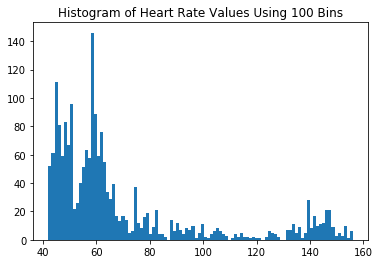

In [3]:
import matplotlib.pyplot as plt
plt.hist(Y,bins=100)
plt.title("Histogram of Heart Rate Values Using 100 Bins")
plt.show()
#trimodal? Idk if the last one is big enough to be considered a peak
#most heart rates are either around 45 or 60

(1c) Review. Plot a 5th-order polynomial to this data. Does a polynomial regression even make sense here? Is this an appropriate model for the data? Most of the plotting code is done for you, just change the line that plots the linear regression line. Use the previous assignment for reference.

Write your code and answers as comments below. Show your plot as well.

In [4]:
m = len(Y)
Y_vec = Y
# create the matrix for X using numpy
# recall that X should be of shape (m,6)
# that is, it should have m rows
# and 6 columns
# the first column should be all 1s
# the second column should be x
# the third column should be the square of x
# the fourth column should be the cube of x
# the fifth column should be the fourth power of x
# the sixth column should be the fifth power of x
### Write code below ###
X_arr = np.zeros((m,6))
for i in range(m):
    X_arr[i][0] = 1
    X_arr[i][1] = X[i]
    X_arr[i][2] = (X[i])**2
    X_arr[i][3] = (X[i])**3
    X_arr[i][4] = (X[i])**4
    X_arr[i][5] = (X[i])**5
### Write code above ###
assert X_arr.shape[0] == m
assert X_arr.shape[1] == 6
assert np.allclose(X_arr[:,0],np.ones((m)))
assert np.allclose(X_arr[:,1], np.squeeze(X))


# transposing a numpy array is extremely easy
# taking matrix multiplication is also straight-
# forward with numpy
XTX = np.matmul(X_arr.T,X_arr)
XTY = np.matmul(X_arr.T,Y_vec)


# use np.linalg.solve to solve (X.T*X)*betas=(X.T*Y)
### Write code below ###
betas = np.linalg.solve(XTX,XTY)
### Write code above ###

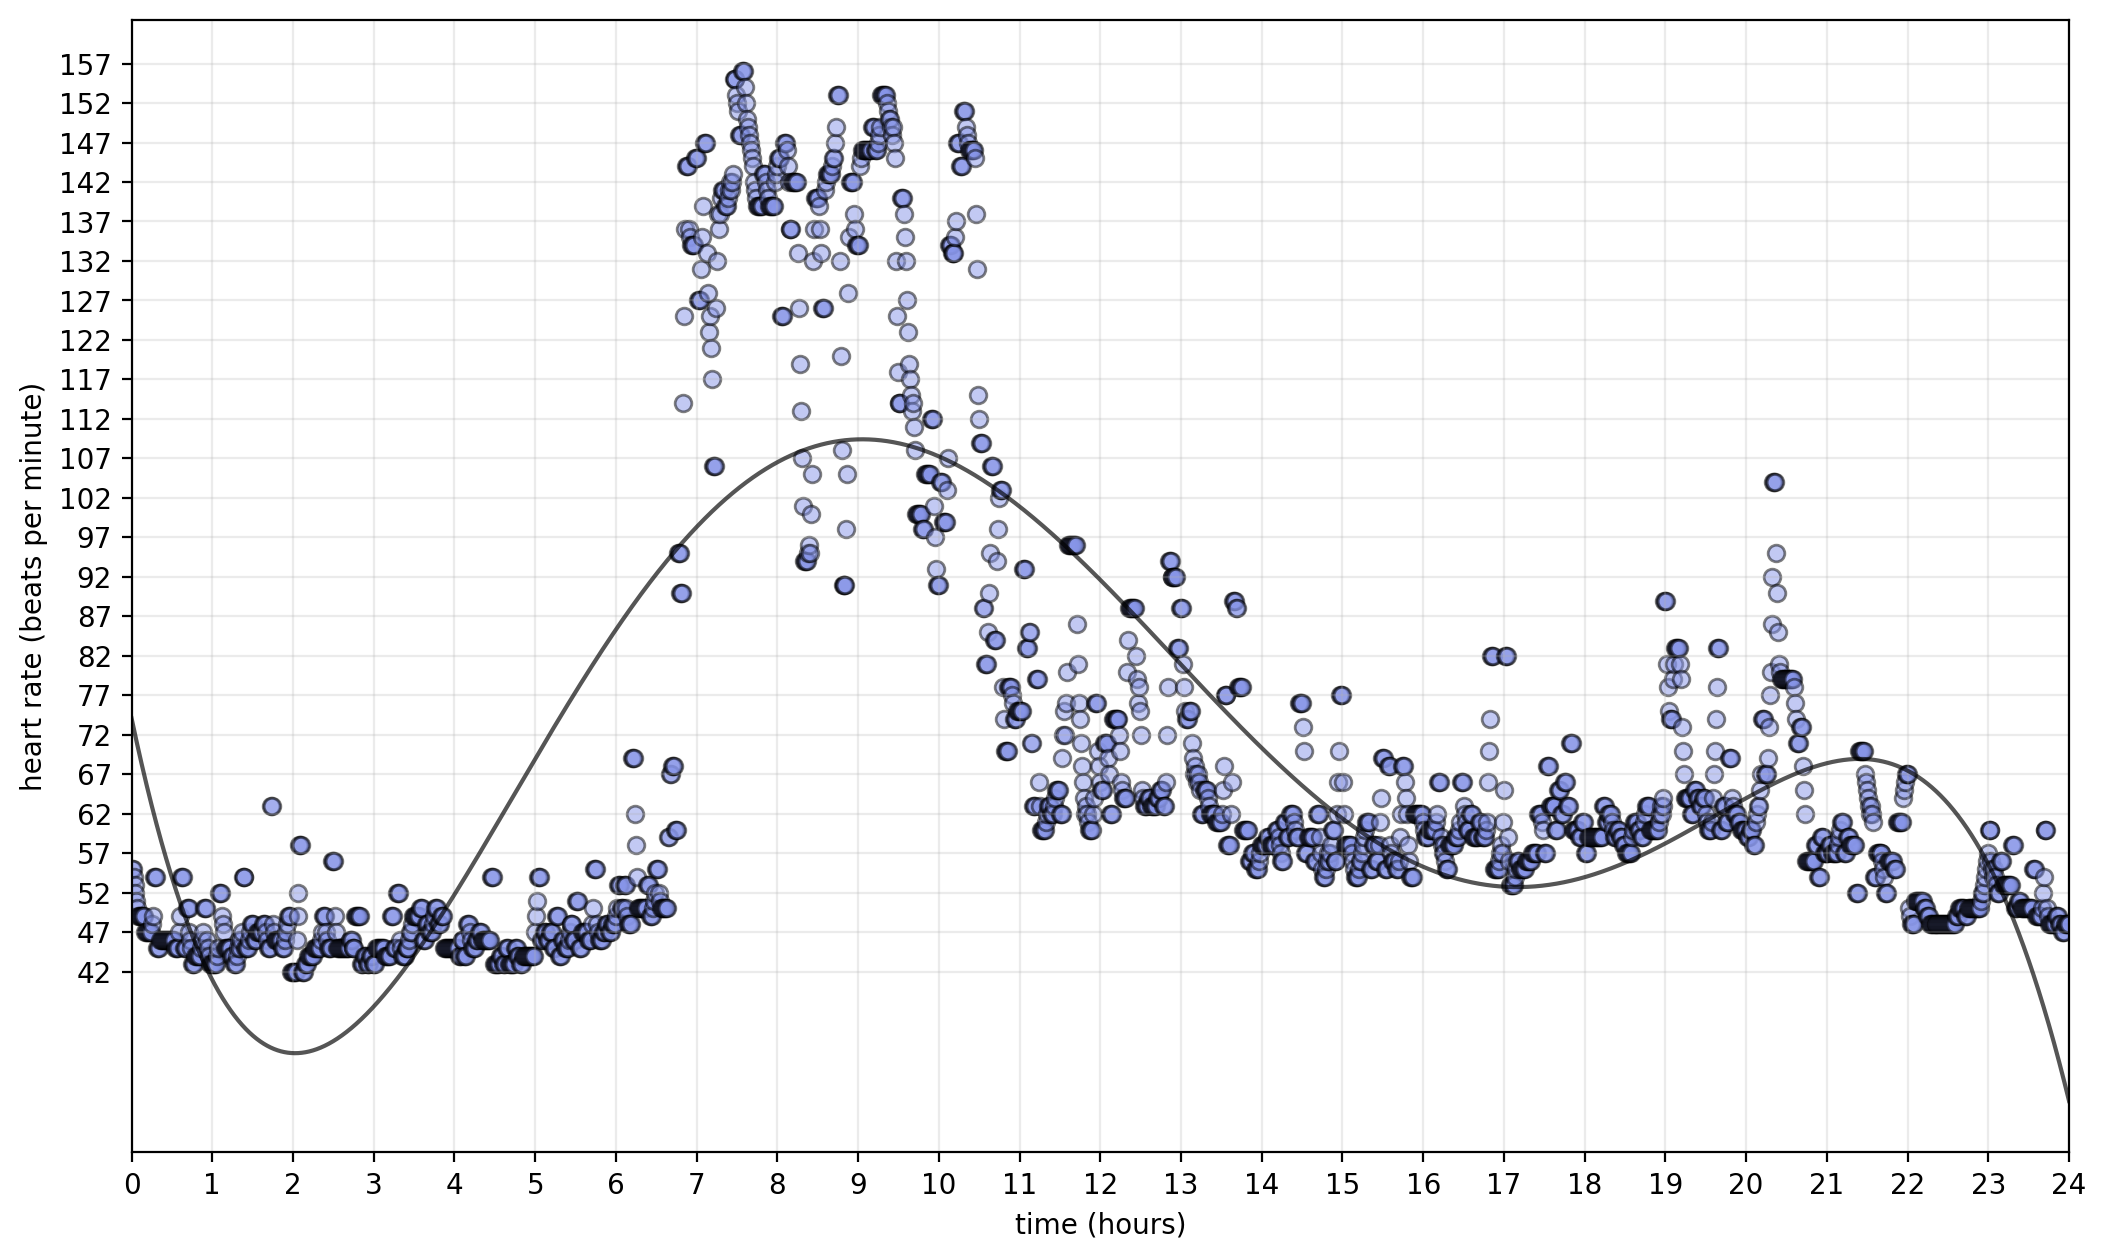

In [5]:
plt.figure(2, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=0, stop=24, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X, betas[0]+betas[1]*tmp_X+betas[2]*(tmp_X**2) + betas[3]*(tmp_X**3) + betas[4]*(tmp_X**4) + betas[5]*(tmp_X**5), 'k-', alpha=2./3, label='least squares')
### Don't edit the code below, only add the polynomial regression plotting line above ###
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.yticks(np.arange(min(Y), max(Y)+5, 5))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1d) Run the following code below and add the line you used above to plot the polynomial regresssion line. All I've done is extend the $x$-values that the regression takes beyond what our polynomial regression is trained on. Does the polynomial predict the heart rate at the times before and after the data it trains on? What does this say about the generalizability of the model? Again, is a polynomial regression even a valid model for this problem?

Write your answer as comments below.

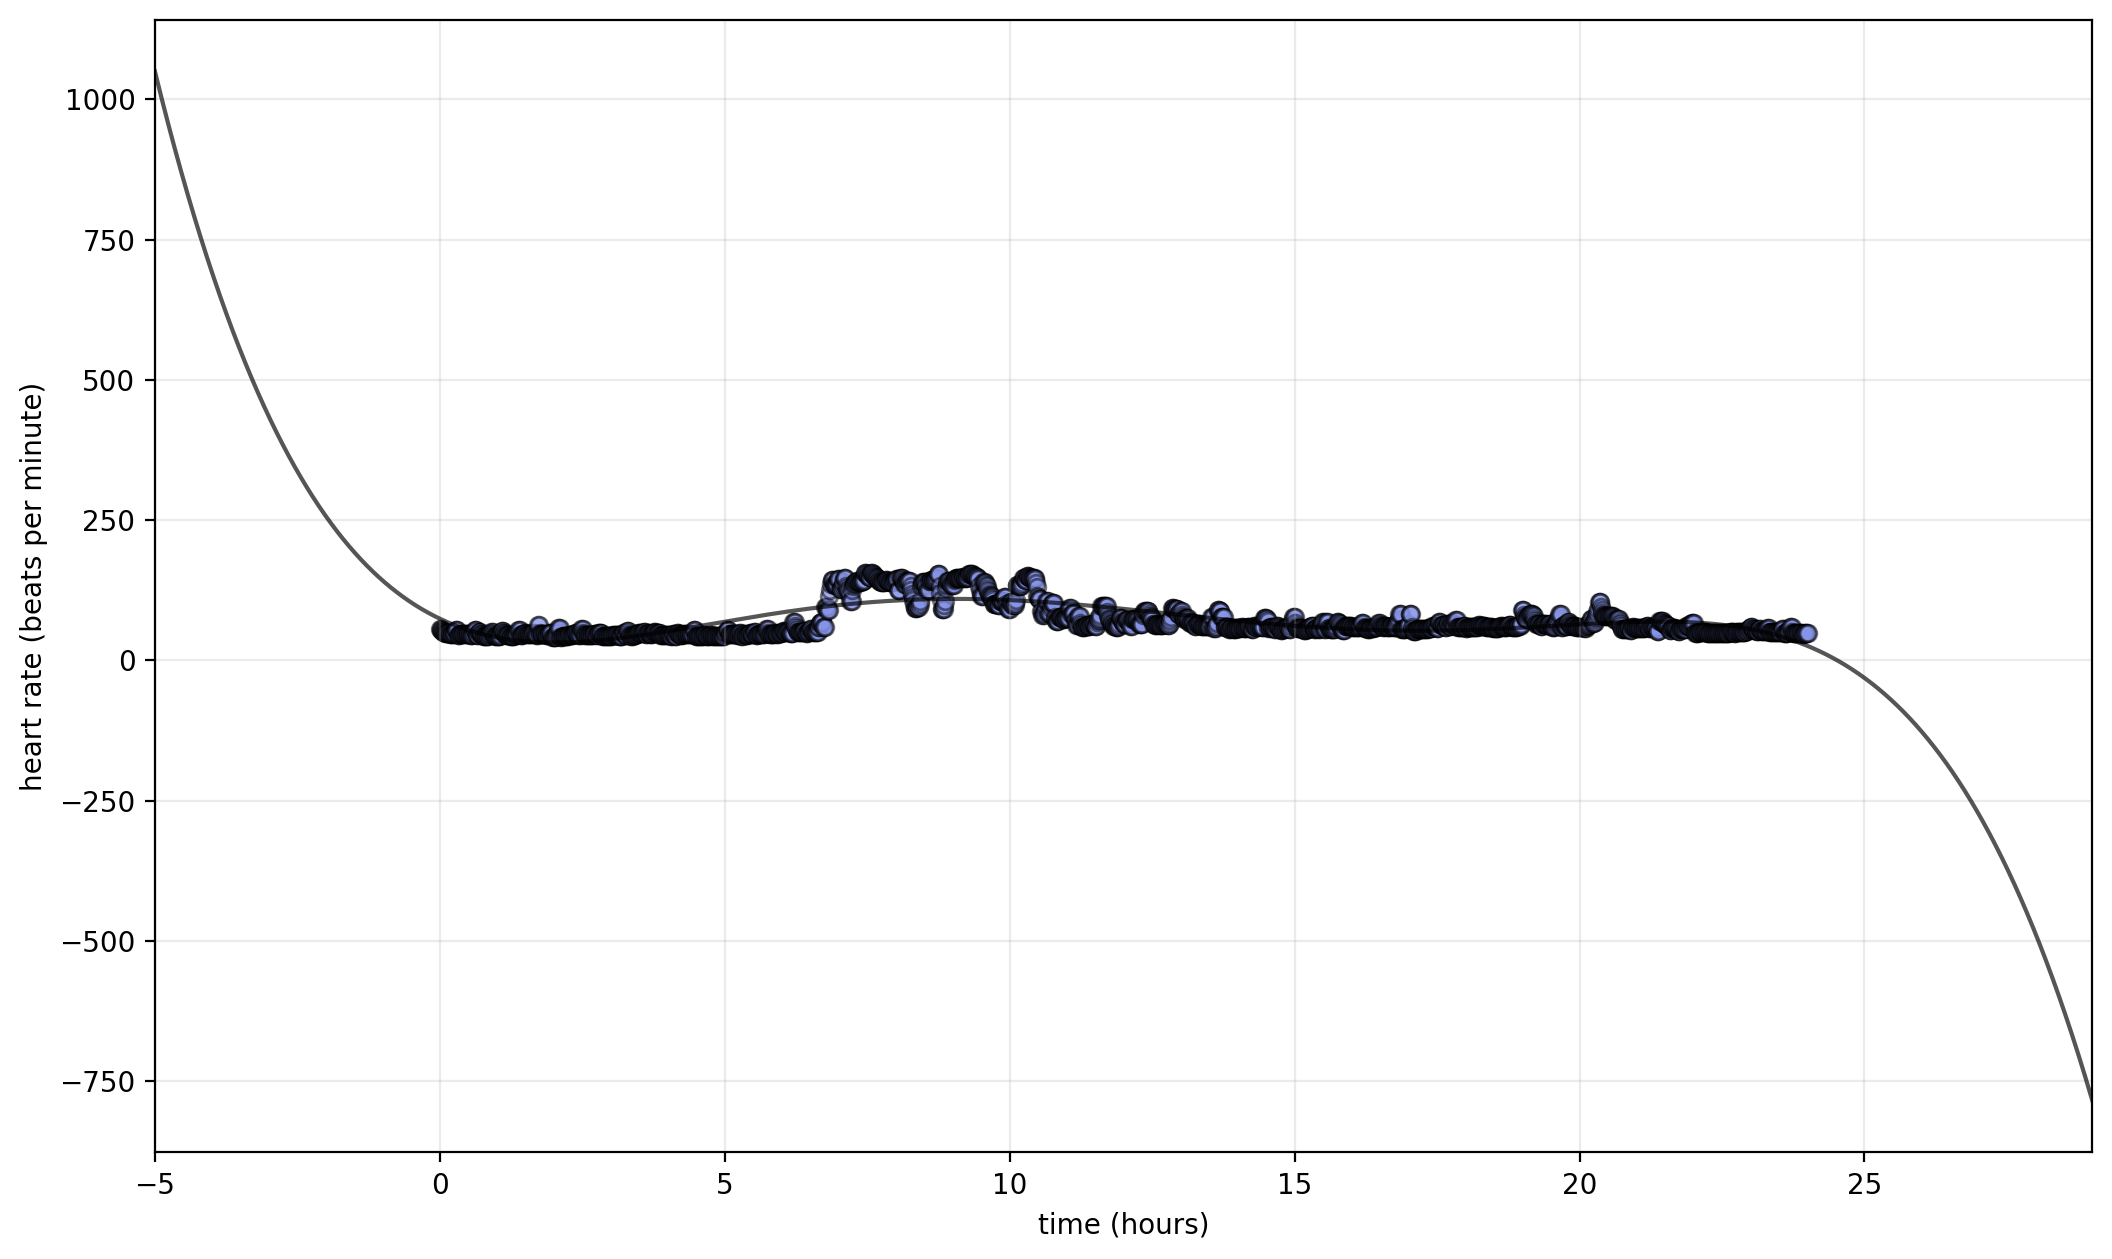

In [6]:
plt.figure(3, figsize=(12.5, 7.5), dpi=200)
plt.scatter(X, Y, edgecolors='k', marker="o", color="#8795E8", alpha=0.5)
tmp_X = np.linspace(start=-5, stop=24+5, num=50*len(Y))
### Don't edit the code above, only add the polynomial regression plotting line below ###
plt.plot(tmp_X, betas[0]+betas[1]*tmp_X+betas[2]*(tmp_X**2) + betas[3]*(tmp_X**3) + betas[4]*(tmp_X**4) + betas[5]*(tmp_X**5), 'k-', alpha=2./3, label='least squares')
### Don't edit the code below, only add the polynomial regression plotting line below ###
plt.grid(True, alpha=0.25)
plt.xlim(np.min(tmp_X), np.max(tmp_X))
plt.ylabel('heart rate (beats per minute)')
plt.xlabel('time (hours)')
plt.show()
#does bad
#big and negative heart rate

(1e) Try to find the derivative (or the gradient) of the signal. Remember that you do not have access to the symbolic function that produces this data, i.e. you don't have $f(x)$ such that you can just simply write code for $f'(x)$, the derivative of that function. This implies that the derivative of this signal has to be taken _numerically_. Use the `numpy` function that calculates the gradient on the data for this signal. Read the documentation for the function. First define the following terms:
1. Finite difference
2. Forward difference & Backward difference
3. Central difference

Then answer, how does the `numpy` function that you've found use forward, backward, and central differences to calculate the gradient numerically? (For which values is the gradient or the derivative of the signal calculated using the forward difference, what about the backward difference, and what about the central difference?)

Then use the `numpy` function to calculate the gradient of the signal and plot it against the original data. Does the value of the derivative make sense? 

##### NOTE:
It might not like the shape of the data array you're feeding it. Look up the `numpy` function called `np.squeeze()`, read its documention and use it on your data before applying the gradient.

Write your answer below. Fill out the code block after.

#Finite difference - difference between the y values at two diff x values divided by the difference of the x values
#Forward difference - take difference between x and x + delta_x --> divide by delta_x
#Backward difference - take difference between x and x - delta_x --> divide by delta_x
#Central difference - take difference between x + delta_x and x - delta_x --> divide by 2*delta_x
#numpy function uses central for all middle values, forward for edge values with lower x, and backward for edge values with higher x

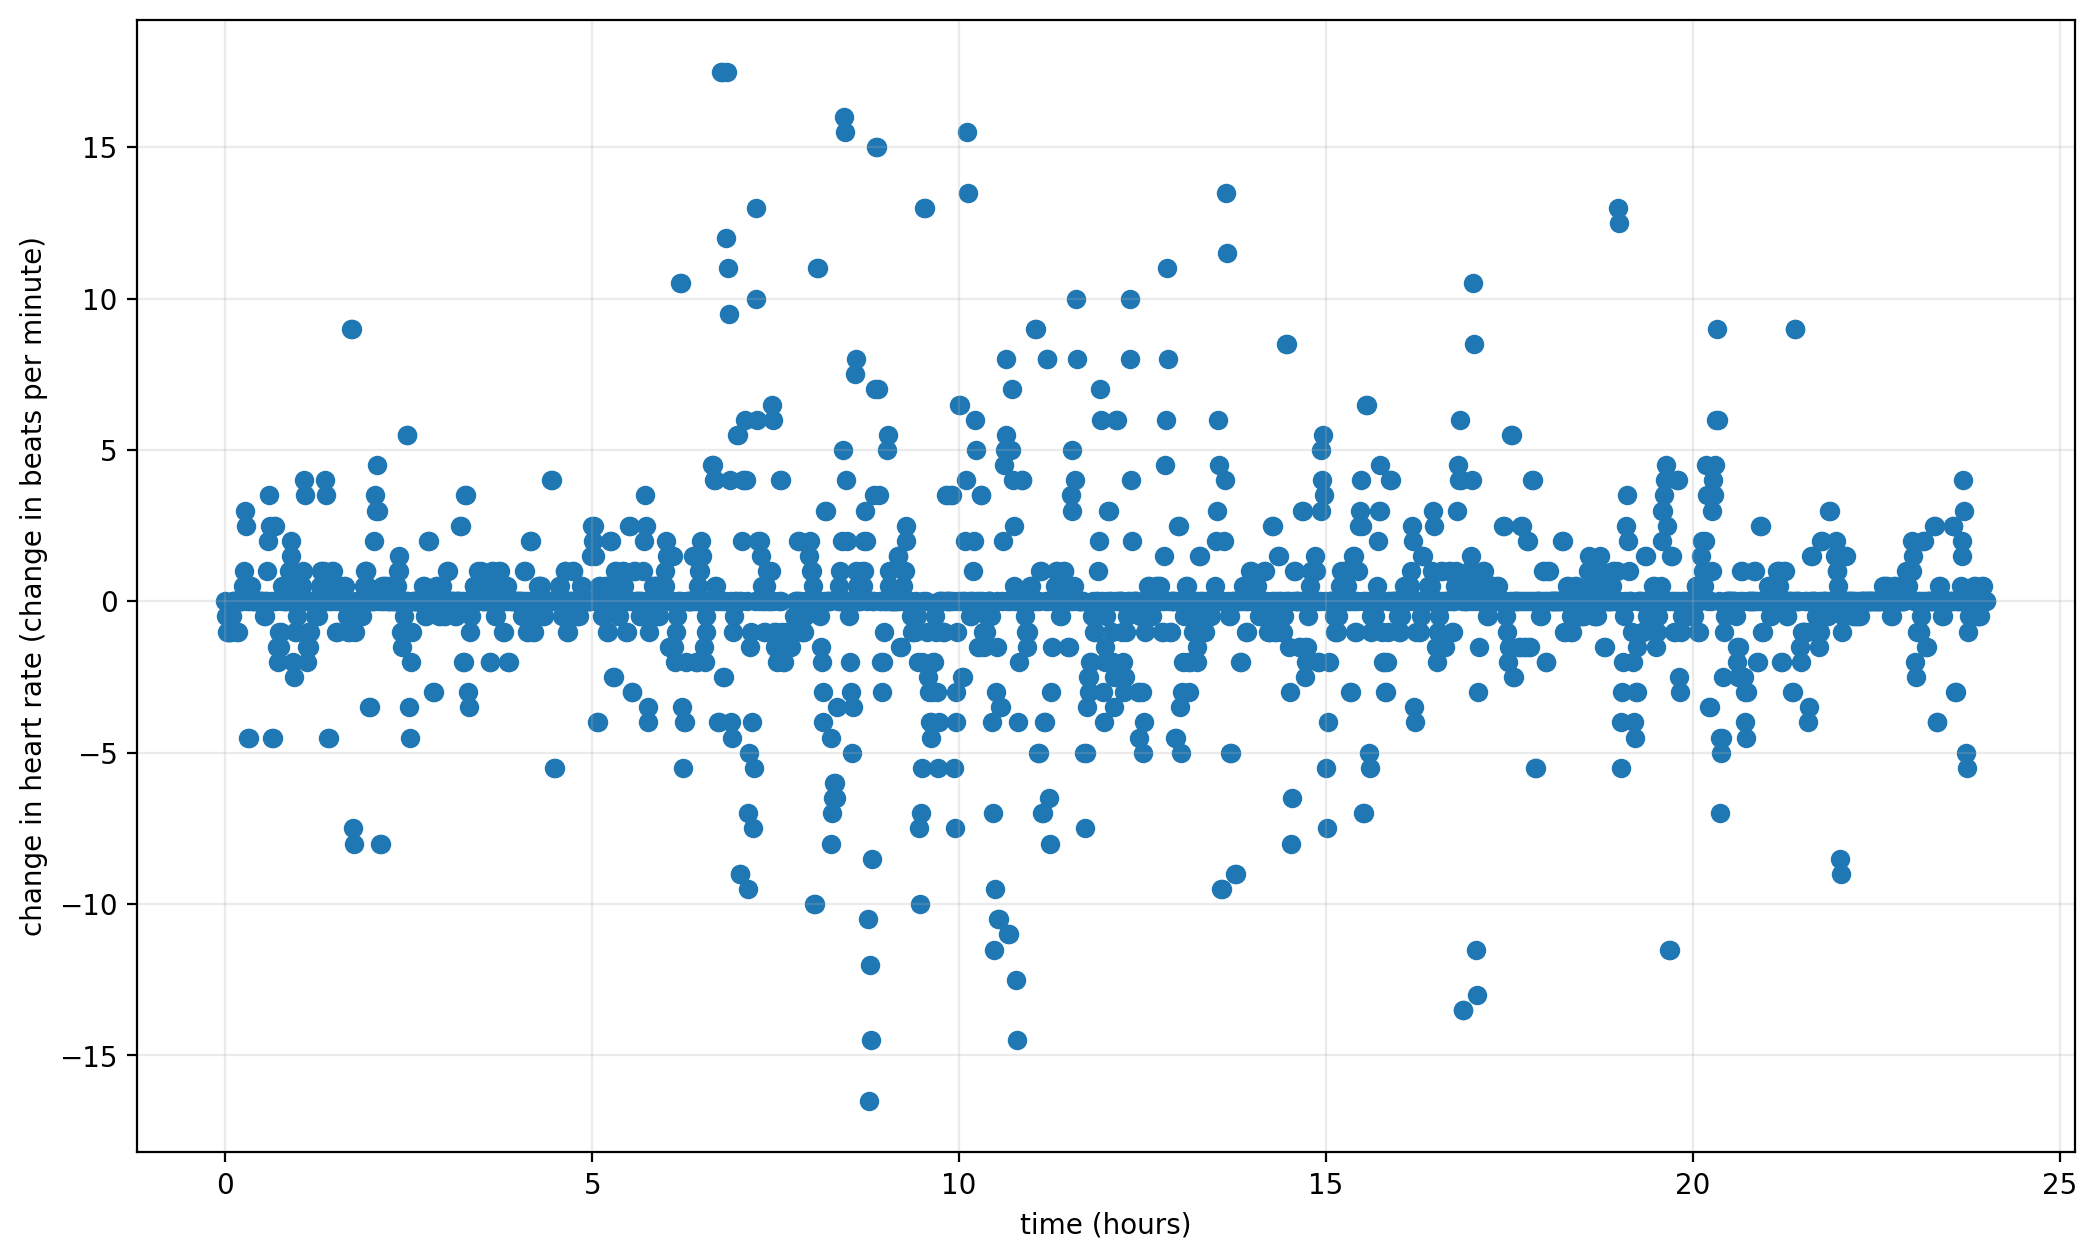

In [13]:
plt.figure(4, figsize=(12.5, 7.5), dpi=200)
### Don't edit the code above, only add the gradient of the signal below ###
plt.scatter(X,np.gradient(np.squeeze(Y_vec)))
### Don't edit the code below, only add the gradient of the signal above ###
#plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.grid(True, alpha=0.25)
#plt.xlim(np.min(X), np.max(X))
plt.ylabel('change in heart rate (change in beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1f) What do the sudden spikes in the gradient represent? Write what you've just calculated in a way where someone who didn't know what a derivative was understood what the blue spikes meant; i.e., this blue spiky line represents the change in... with respect to....

Write your answer below.

(1g) You may be noticing that I'm asking you to write fewer functions of your own, and asking you to use ones that you find online through documentation. This is because in practice, writing functions of your own only really happens in the last step of software development, in either academic or industrial research. This is because the functions that exist already are likely, faster, more well-behaved, and tested more than the functions you write are. This is not a bad thing and is in fact very good, because for one, it ensures open science and reproducbility amongst programmers, and encourages good code-writing practices. One issue is that it introduces narrow-minded ways of programming and limits the motivation for innovating. However, with the recent advances in devops such as Kubernetes, cloud storage and engineering such as AWS, and low-level environment control such as Docker, it seems as though using APIs, which are large codebases provided by companies and code-writing groups, may (will) be the future. `numpy` is already one such (free) API!

I'll introduce you to a simple example of this here. Our goal is going to be to calculate the _moving average_ of this signal. Look up what a moving average is, and define it here. Should the moving average make the signal look _smoother_ or _rougher_? Any implementation of a moving average takes in as a parameter or argument, something called the _moving window size_. What is this parameter for?

(1h) Install the library called `bottleneck` [Bottleneck](https://pypi.org/project/Bottleneck/) on your system. Use the terminal in `JupyterLab` to do this. Use the command `pip install Bottleneck` in your terminal. It might be that you've already had this installed; in that case that your terminal returns `Requirement already satisfied`. Take a minute to read the documentation on the website. What advantages does this library of functions provide? Look up what the programming language C is and compare it to Python, if you're unsure.

Write your answer below.

(1i) Write the `import` statement for this package in the way the documentation says to and employ the `move_mean` function to calculate the moving average. See that it takes a `window` argument as well. Show the effect of having different window sizes on the moving average. Know that this is not a _centered moving average_, that is, this moving average will shift the data. Though this is somewhat nontrivial to know, disregard it for now. What does increasing the _window size_ argument do to the signal? You can find more documentation here: https://kwgoodman.github.io/bottleneck-doc/reference.html#bottleneck.move_mean .

Iterate over increasing window sizes and show the effect in a plot. Write your code and show as plot below. Note that you will have to use `np.squeeze()` on your data here as well.

In [8]:
import bottleneck as bn

for i in np.linspace(1,100,5, dtype=int):
    plt.figure(5+i, figsize=(12.5, 7.5), dpi=200)
    print('Window size: {}'.format(i))
    ### Don't forget to add the import statement for bottleneck
    ### Add the function line below that takes the moving average of the data ###
    pass
    ### Add the function line above that takes the moving average of the data ###
    ### Don't forget to use np.squeeze(Y) ###
    plt.plot(X,arr)
    plt.xticks(np.arange(min(X), max(X)+1, 1.0))
    plt.yticks(np.arange(min(Y), max(Y)+5, 5))
    plt.grid(True, alpha=0.25)
    plt.xlim(np.min(X), np.max(X))
    plt.ylabel('heart rate (beats per minute)')
    plt.xlabel('time (hours)')
    plt.show()

Window size: 1


NameError: name 'arr' is not defined

<Figure size 2500x1500 with 0 Axes>

(1j) What does increasing the window size do? Is it shifting the data? Would taking the gradient of a moving-averaged signal be a smoother gradient? Take the gradient of the smoothest signal you have and compare it to the gradient of the true signal. Is one more informative or comprehensible than the other?

Write your code and answers as comments below. Show your plot as well.

In [ ]:
plt.figure(4, figsize=(12.5, 7.5), dpi=200)
tmp_X = np.linspace(start=0, stop=24, num=50*len(Y))
### Don't edit the code above, only add the gradient of the smoothed signal below ###
pass
### Don't edit the code below, only add the gradient of the smoothed signal above ###
plt.xticks(np.arange(min(X), max(X)+1, 1.0))
plt.grid(True, alpha=0.25)
plt.xlim(np.min(X), np.max(X))
plt.ylabel('change in heart rate (change in beats per minute)')
plt.xlabel('time (hours)')
plt.show()

(1k) Finally, we are going to _convolve_ this signal with a _filter_. Convolution as a mathematical process is difficult to assign physical meaning or interpreation to. Mathematically, we are trying to find the shared area between two signals. More practically, I like to think of it as comparing some data (a true signal) and a pattern (something we expect in the data). When we convolve a true signal with a pattern signal, we can find when similar patterns in the data appear. Sometimes this pattern-finder is called a filter (or a convolutional filter). You are encouraged to read more about convolution [convolution @ wikipedia](https://en.wikipedia.org/wiki/Convolution) because it will take too much time to learn the mathematically rigorous way of defining a convolution through this assignment alone. Instead, you will attain an intuitive grasph over it by using code that performs convolutions. I find that this [slide deck](http://situs.biomachina.org/hn06/talks/Baldwin/convolution_filters_new.pdf) is also useful for understanding what a convolution does. Using the links provided, your experience in past classes, and your general resourcefulness, read about what a convolution is in the context of signal processing.

Below write your own inerpretation of what a convolution is (without using too many technical mathematical terms). You are encouraged to use any internet resource or any previously existing answer that you find online or through literature that resonates the best with you. If employing mathematical notation assists your grasp of convolutions, write them as well.

(1l) Convolve the signal with the provided filter stored in the variable called `win`. You should be using a `numpy` signal that convolves two signals together. Use the default argument `full` for the `mode` argument input to the function. You will also have to normalize your filtered signal, that should be stored in the provided variable `filtered` by the sum of the window filter. That is, make sure to add the line `filtered = filtered/sum(win)`, or in pythonic fashion `filtered /= sum(win)`. Or do this in the same line where you convolve the signals.

Write your code below. The plotting code is done for you.

In [ ]:
from scipy import signal
win = signal.hamming(50)

### Write code below to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###
### You will also have to normalize the filtered signal by the sum of the filter ###
### That is, divide the filtered array by sum(win) after convolving ###
pass
### Write code above to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###

### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True, dpi=200)
ax_orig.plot(np.squeeze(Y))
ax_orig.set_title('Original signal')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()
### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.

(1m) Does your definition of what a convolution is match what happened above? Play around with the code (i.e., change the length of the window variable `win` by making it much less than a 100 or much greater than a 100). Copy the code above, but instead use a different window function. Pick a window function from the following list: 

https://scipy.github.io/devdocs/signal.windows.html

Read its documentation and the origin of the filter you choose using Wikipedia. Then implement it by changing the `win` variable after copying the variable in a code block below. Does the result match your expectation? 

Write your code and answer as comments below. Show the plot as well.

(1n) Do the same as above, but with a `boxcar` [window](https://scipy.github.io/devdocs/generated/scipy.signal.windows.boxcar.html#scipy.signal.windows.boxcar).

Write your code and answer as comments below. Show the plot as well.

In [ ]:
from scipy import signal
win = signal.boxcar(500)

### Write code below to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###
### You will also have to normalize the filtered signal by the sum of the filter ###
### That is, divide the filtered array by sum(win) after convolving ###
pass
### Write code above to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###

### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True, dpi=200)
ax_orig.plot(np.squeeze(Y))
ax_orig.set_title('Original signal')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()
### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.

(1o) Do the same as above, but with a `triang` [window](https://scipy.github.io/devdocs/generated/scipy.signal.windows.triang.html#scipy.signal.windows.triang).

Write your code and answer as comments below. Show the plot as well.

In [ ]:
from scipy import signal

### Write code below to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###
### You will also have to normalize the filtered signal by the sum of the filter ###
### That is, divide the filtered array by sum(win) after convolving ###
pass
### Write code above to convolve the signal with the provided win variable ###
### Don't forget to use the np.squeeze() function on your data signal first ###

### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True, dpi=200)
ax_orig.plot(np.squeeze(Y))
ax_orig.set_title('Original signal')
ax_orig.margins(0, 0.1)
ax_win.plot(win)
ax_win.set_title('Filter impulse response')
ax_win.margins(0, 0.1)
ax_filt.plot(filtered)
ax_filt.set_title('Filtered signal')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()
### If the normalized filtered signal you've created above is stored in the variable
### named filtered, then the plotting code below does not need to be edited.

---